In [ ]:
!pip install transformers

In [1]:
from google.colab import drive
from keras.utils.np_utils import to_categorical
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


***Read the dataset and preprocess it***

In [2]:
img_height = 512
img_width = 512
data_dir = "/content/drive/MyDrive/Diabetic Retinopathy Detection/Testing Dataset"
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0,
  image_size=(img_height, img_width),
  )

train_ds = test_ds.map(lambda x, y: (x, y))


Found 160 files belonging to 5 classes.


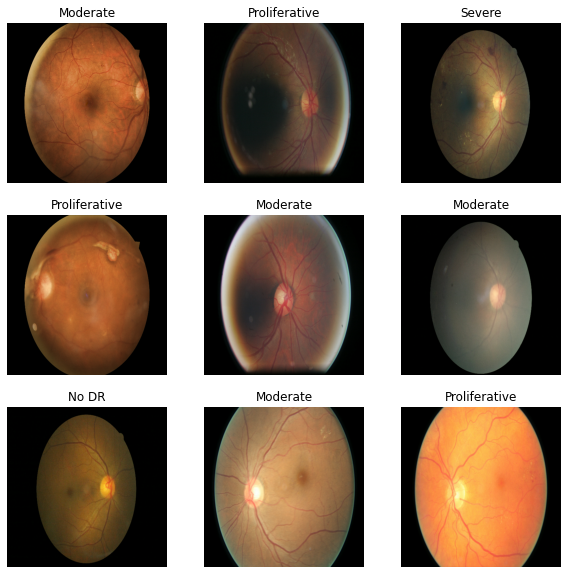

In [3]:
CLASSES=['No DR', 'Mild','Moderate','Severe','Proliferative']
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")
  break

***Import our Ensemble Model and create an instance for prediction***

In [4]:
import sys
sys.path.append("/content/drive/MyDrive/Diabetic Retinopathy Detection/")

In [5]:
from models import DREnsembleDetector #local import
dr_detector= DREnsembleDetector(
    inception_resnet_weights="/content/drive/MyDrive/Diabetic Retinopathy Detection/Weights/InceptionResNet/cp",
    modified_vgg16_weights="/content/drive/MyDrive/Diabetic Retinopathy Detection/Weights/inceptionv3/inceptionv3_kaggle_model.h5",
    cnn_weights="/content/drive/MyDrive/Diabetic Retinopathy Detection/Weights/CNN_Model_weights/Weights",
    transformers_weights="/content/drive/MyDrive/Diabetic Retinopathy Detection/Weights/transformers/final final",
)

***Predict using the ensemble model***

ensemble prediction: [[0.03548864 0.013771   0.78376013 0.07733273 0.08964754]]


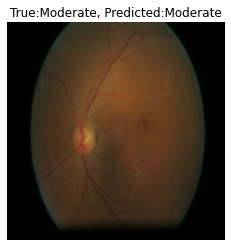

In [22]:
for images, labels in test_ds.take(1):
  for i in range(1):
    ax = plt.subplot(1, 1, i + 1)
    plt.title("True:"+CLASSES[labels[i]]+", Predicted:"+ CLASSES[dr_detector.predict(images[i].numpy().astype("uint8")).argmax()])
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    print("ensemble prediction:",dr_detector.predict(images[i].numpy().astype("uint8")))
  break

***Discussion***

To sum up, we've trained 4 different models on different portions of the insanely large dataset(88gb). Then, we've combined them in an ensemble model for prediction. Each model contributes to the prediction with a given weight according to its validation accuracy.